In [2]:
import numpy as np
import plotly.graph_objects as go

# imu_data = np.loadtxt("D:/graduate/groundeffect/data_imu_motor/imu_data_1112-1424_00d.csv", delimiter=',')
imu_data = np.loadtxt("/home/nuci7/project/cf2/crazyflie-firmware/control/data/imu_data_1112-1603_45d.csv", delimiter=',')

# gyro.xRaw gyro.yRaw gyro.zRaw motor1 motor2 motor3 motor4 zrange timestamps
# Infomation: v=0.2m/s, height_desk=80cm

# Normalizing the PWM
imu_data[:,3:7] = imu_data[:,3:7]/((1<<16)-1)

In [3]:
1<<16-1

32768

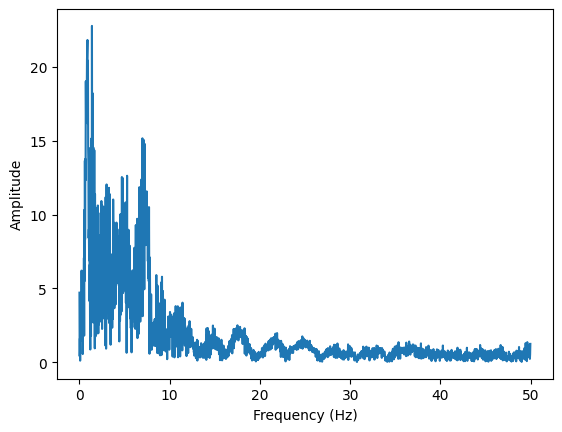

In [4]:
import numpy as np
import matplotlib.pyplot as plt
data = imu_data[:,0]
fft_result = np.fft.fft(data)
amplitude_spectrum = 2.0 / len(data) * np.abs(fft_result[:len(data)//2])
sampling_rate = 100
freq = np.arange(len(data)) * (sampling_rate / len(data))
plt.plot(freq[:len(data)//2], amplitude_spectrum)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.show()

In [5]:
# 画图：4个motor+高度计
import scipy.signal as signal_p

# Define filter parameters
fs = 100  # Sampling frequency
fc = 4  # Cutoff frequency
order = 6  # Filter order



# Create low-pass Butterworth filter
b, a = signal_p.butter(order, fc / (fs / 2), btype='low')

# Apply filter to signal data
signalf = signal_p.filtfilt(b, a, imu_data[:,:6], axis=0)
timestamp = imu_data[:,-2]
fig = go.Figure()
fig.add_trace(go.Scatter(x=timestamp, y=imu_data[:,3],
                    mode='lines',
                    line=dict(width=0.5),
                    name='m1'))
fig.add_trace(go.Scatter(x=timestamp, y=imu_data[:,4],
                    mode='lines',
                    line=dict(width=0.5),
                    name='m2'))
fig.add_trace(go.Scatter(x=timestamp, y=imu_data[:,5],
                    mode='lines',
                    line=dict(width=0.5),
                    name='m3'))
fig.add_trace(go.Scatter(x=timestamp, y=imu_data[:,6],
                    mode='lines',
                    line=dict(width=0.5),
                    name='m4'))
fig.add_trace(go.Scatter(x=timestamp, y=imu_data[:,8]/1000,
                    mode='lines',
                    line=dict(width=0.5),
                    name='zrange'))


# # Add a rectangle to the plot
# fig.add_shape(type='rect',
#               x0=0,
#               y0=-2,
#               x1=10,
#               y1=2,
#               line=dict(color='blue', width=0.5),
#             #   fillcolor='lightblue',
#               opacity=0.5)

fig.add_shape(type='line',
                x0=0,
                y0=0,
                x1=timestamp[-1].astype(float),
                y1=0,
                line=dict(color='black', width=0.5),
            #   fillcolor='lightblue',
                opacity=1)

    
    


fig.update_layout(xaxis_title='timestamps s',
                        yaxis_title='Amplitude m/s2',
                        font=dict(size=25, family='Arial', color='rgb(0, 0, 0)'),
                        margin={'l': 15, 'r': 15, 't': 15, 'b': 15},
                        # width=1000, height=400,
                        legend=dict(
                            yanchor="top",
                            y=1.2,
                            xanchor="left",
                            x = 0.25,
                            font=dict(
                                family='Arial',
                                size=25,
                                color='rgb(0, 0, 0)',
                            ),
                            orientation="h",
                            # bordercolor="Black",
                            # borderwidth=1
                        ),
                        plot_bgcolor='rgb(255,255,255)',
                        xaxis=dict(
                            showline=True,
                            linecolor='rgb(0, 0, 0)',
                            linewidth=2,
                            ticks='inside',
                            tickfont=dict(
                                family='Arial',
                                size=20,
                                color='rgb(0, 0, 0)',
                            ),
                            tick0 = 150,
                            dtick = 10,
                            gridcolor='rgb(245, 245, 245)',
                            mirror=True
                        ),
                        yaxis=dict(
                            # range = [0, 1],
                            showline=True,
                            linecolor='rgb(0, 0, 0)',
                            linewidth=2,
                            ticks='inside',
                            tickfont=dict(
                                family='Arial',
                                size=20,
                                color='rgb(0, 0, 0)',
                            ),
                            tickformat='.2f',   # y轴刻度分辨率
                            gridcolor='rgb(245, 245, 245)',
                            mirror=True
                        ),
        )

fig.show()

In [6]:
# 画图：3轴陀螺仪+高度计

import scipy.signal as signal_p

# Define filter parameters
fs = 100  # Sampling frequency
fc = 4  # Cutoff frequency
order = 6  # Filter order



# Create low-pass Butterworth filter
b, a = signal_p.butter(order, fc / (fs / 2), btype='low')

# Apply filter to signal data
signalf = signal_p.filtfilt(b, a, imu_data[:,:6], axis=0)
timestamp = imu_data[:,7]
fig = go.Figure()
fig.add_trace(go.Scatter(x=timestamp, y=imu_data[:,0],
                    mode='lines',
                    line=dict(width=0.5),
                    name='aX'))
fig.add_trace(go.Scatter(x=timestamp, y=imu_data[:,1],
                    mode='lines',
                    line=dict(width=0.5),
                    name='aY'))
fig.add_trace(go.Scatter(x=timestamp, y=imu_data[:,2],
                    mode='lines',
                    line=dict(width=0.5),
                    name='aZ'))
fig.add_trace(go.Scatter(x=timestamp, y=imu_data[:,8]/1000,
                    mode='lines',
                    line=dict(width=0.5),
                    name='zrange'))


# # Add a rectangle to the plot
# fig.add_shape(type='rect',
#               x0=0,
#               y0=-2,
#               x1=10,
#               y1=2,
#               line=dict(color='blue', width=0.5),
#             #   fillcolor='lightblue',
#               opacity=0.5)

fig.add_shape(type='line',
                x0=0,
                y0=0,
                x1=timestamp[-1].astype(float),
                y1=0,
                line=dict(color='black', width=0.5),
            #   fillcolor='lightblue',
                opacity=1)

    
    


fig.update_layout(xaxis_title='timestamps s',
                        yaxis_title='Amplitude m/s2',
                        font=dict(size=25, family='Arial', color='rgb(0, 0, 0)'),
                        margin={'l': 15, 'r': 15, 't': 15, 'b': 15},
                        # width=1000, height=400,
                        legend=dict(
                            yanchor="top",
                            y=1.2,
                            xanchor="left",
                            x = 0.25,
                            font=dict(
                                family='Arial',
                                size=25,
                                color='rgb(0, 0, 0)',
                            ),
                            orientation="h",
                            # bordercolor="Black",
                            # borderwidth=1
                        ),
                        plot_bgcolor='rgb(255,255,255)',
                        xaxis=dict(
                            showline=True,
                            linecolor='rgb(0, 0, 0)',
                            linewidth=2,
                            ticks='inside',
                            tickfont=dict(
                                family='Arial',
                                size=20,
                                color='rgb(0, 0, 0)',
                            ),
                            tick0 = 150,
                            dtick = 10,
                            gridcolor='rgb(245, 245, 245)',
                            mirror=True
                        ),
                        yaxis=dict(
                            # range = [0, 1],
                            showline=True,
                            linecolor='rgb(0, 0, 0)',
                            linewidth=2,
                            ticks='inside',
                            tickfont=dict(
                                family='Arial',
                                size=20,
                                color='rgb(0, 0, 0)',
                            ),
                            tickformat='.2f',   # y轴刻度分辨率
                            gridcolor='rgb(245, 245, 245)',
                            mirror=True
                        ),
        )

fig.show()

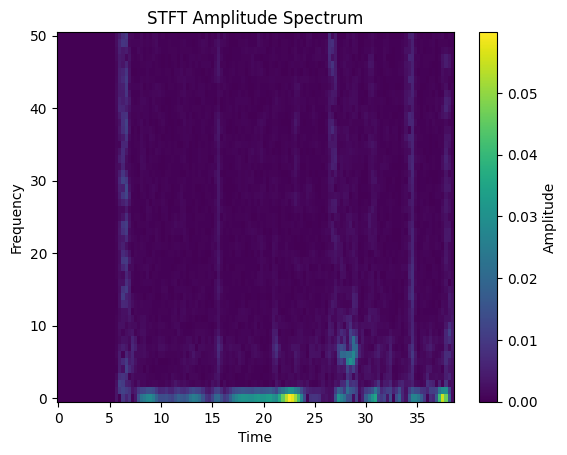

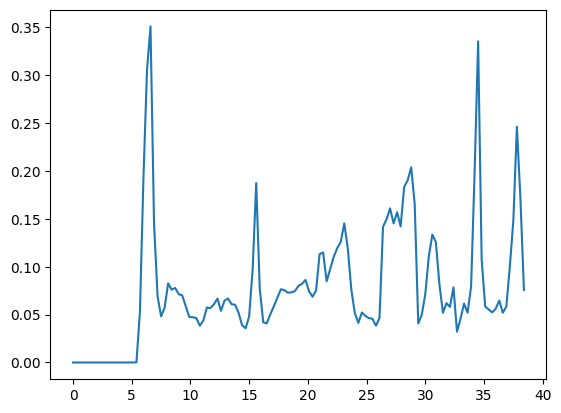

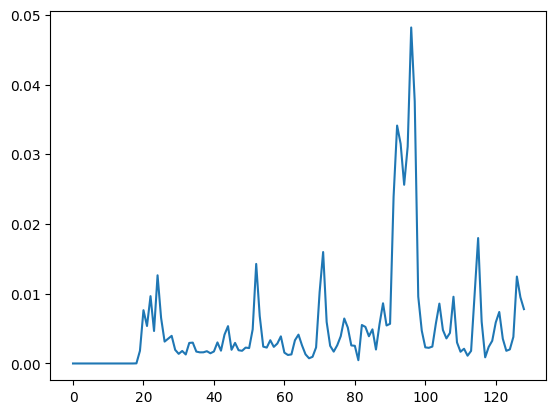

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import stft

# 准备数据
t = np.linspace(0, 1, 1000)  # 时间轴
x = np.sin(2 * np.pi * 50 * t) + np.sin(2 * np.pi * 120 * t)  # 信号
fs=100
nperseg=100
noverlap=70
# 进行短时傅里叶变换
f, t, Zxx = stft(imu_data[:,4]-imu_data[:,3], fs=100, nperseg=100, noverlap=70)
#f, t, Zxx = stft(x, fs=200, nperseg=200, noverlap=170)
# 绘制幅度谱
plt.pcolormesh(t, f, np.abs(Zxx), shading='auto')
plt.colorbar(label='Amplitude')
plt.title('STFT Amplitude Spectrum')
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.show()


# print(np.shape(Zxx))
dd = np.abs(Zxx)
pp = np.sum(dd, axis=0)
time_vector = np.arange(len(pp)) *((nperseg-noverlap)/fs)
plt.plot(time_vector,pp)

plt.figure()
plt.plot(np.sum(abs(Zxx[6:8,:]),axis=0))
plt.show()

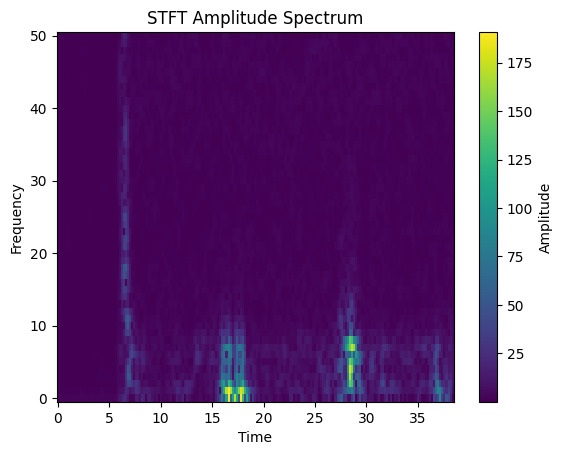

(51, 193)


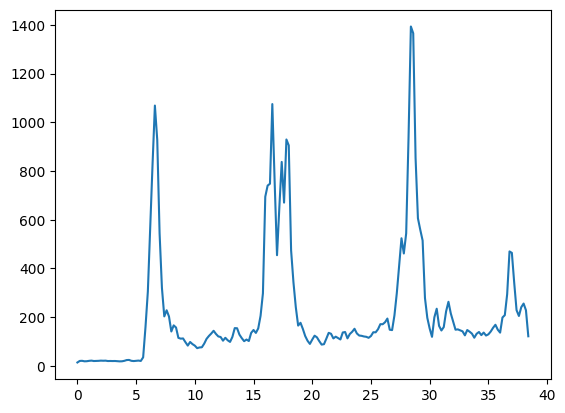

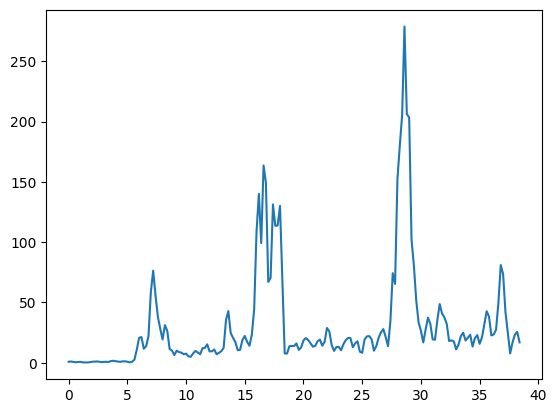

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import stft

# 准备数据
t = np.linspace(0, 1, 1000)  # 时间轴
x = np.sin(2 * np.pi * 50 * t) + np.sin(2 * np.pi * 120 * t)  # 信号
fs=100
nperseg=100
noverlap=80
# 进行短时傅里叶变换
f, t, Zxx = stft(imu_data[:,0], fs=100, nperseg=nperseg, noverlap=noverlap)

# 绘制幅度谱
plt.pcolormesh(t, f, np.abs(Zxx), shading='auto')
plt.colorbar(label='Amplitude')
plt.title('STFT Amplitude Spectrum')
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.show()

print(np.shape(Zxx))

dd = np.abs(Zxx)
pp = np.sum(dd, axis=0)
time_vector = np.arange(len(pp)) *((nperseg-noverlap)/fs)
plt.plot(time_vector,pp)

plt.figure()
plt.plot(t,np.sum(abs(Zxx[6:8,:]),axis=0))
plt.show()

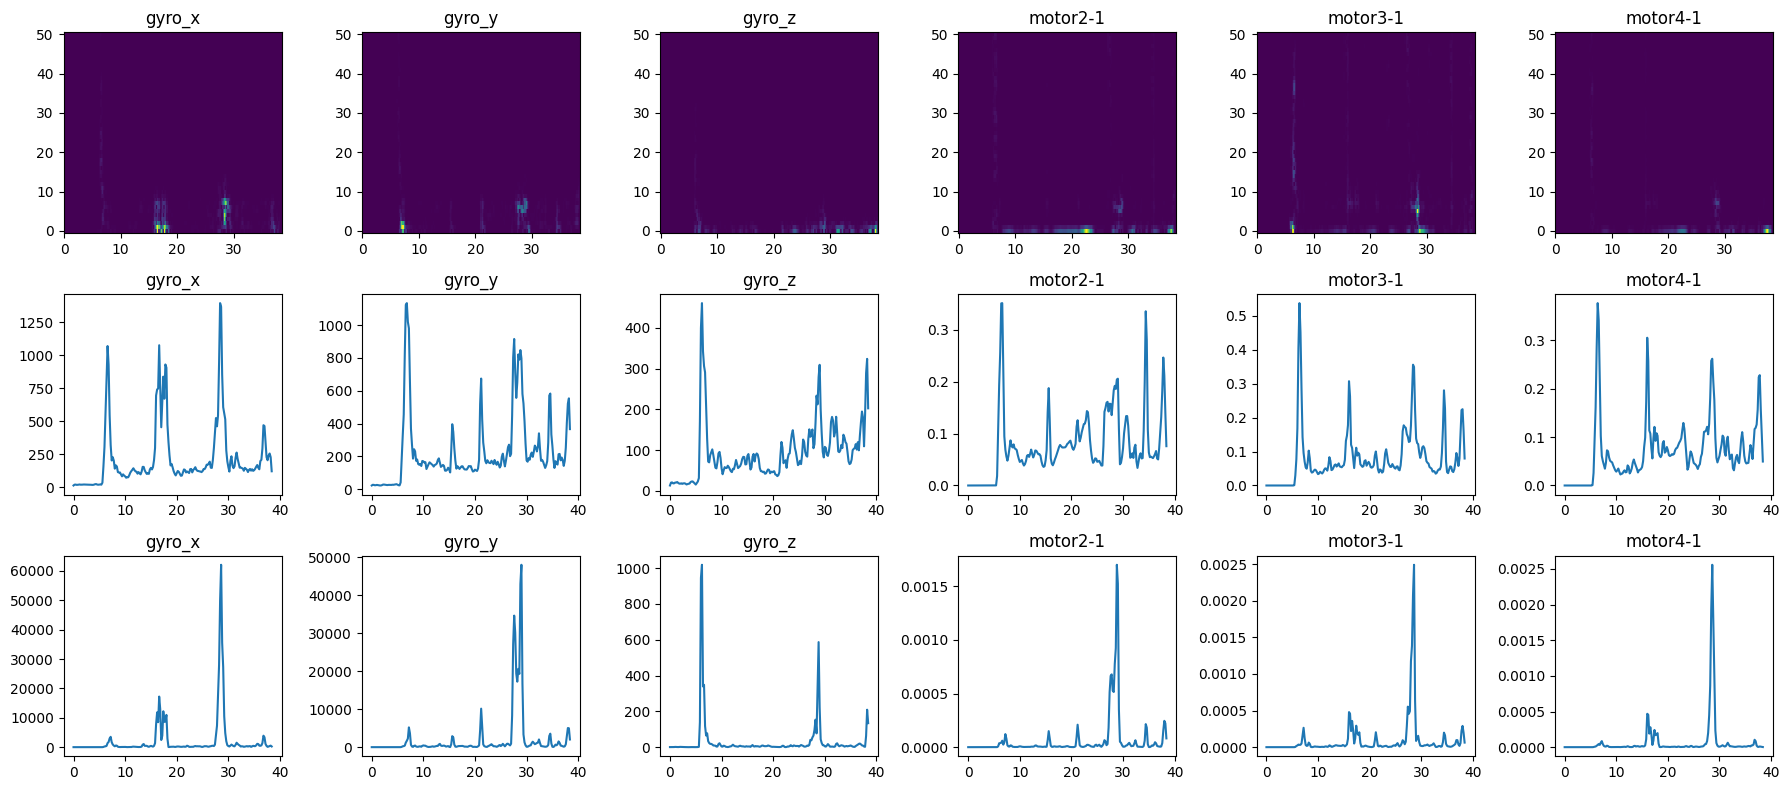

In [36]:
t = np.linspace(0, 1, 1000)  # 时间轴
x = np.sin(2 * np.pi * 50 * t) + np.sin(2 * np.pi * 120 * t)  # 信号
fs=100
nperseg=100
noverlap=80
# 进行短时傅里叶变换
f, t, Zxx = stft(imu_data[:,0], fs=100, nperseg=nperseg, noverlap=noverlap)



# 创建一个包含3行6列的子图布局
fig, axes = plt.subplots(nrows=3, ncols=6, figsize=(18, 8))

# 绘制第一个子图
f, t, Zxx = stft(imu_data[:,0], fs=100, nperseg=nperseg, noverlap=noverlap)
pcm = axes[0, 0].pcolormesh(t, f, np.abs(Zxx)**2, shading='auto')
# cbar = fig.colorbar(pcm, ax=axes[0, 0], label='Amplitude')
axes[0, 0].set_title('gyro_x')
pp = np.sum(np.abs(Zxx), axis=0)
time_vector = np.arange(len(pp)) *((nperseg-noverlap)/fs)
axes[1, 0].plot(time_vector, pp)
axes[1, 0].set_title('gyro_x')

axes[2, 0].plot(time_vector, np.sum(abs(Zxx[6:10,:]**2),axis=0))
axes[2, 0].set_title('gyro_x')


# 绘制第2个子图
f, t, Zxx = stft(imu_data[:,1], fs=100, nperseg=nperseg, noverlap=noverlap)
pcm = axes[0, 1].pcolormesh(t, f, np.abs(Zxx)**2, shading='auto')
# cbar = fig.colorbar(pcm, ax=axes[0, 0], label='Amplitude')
axes[0, 1].set_title('gyro_y')
pp = np.sum(np.abs(Zxx), axis=0)
time_vector = np.arange(len(pp)) *((nperseg-noverlap)/fs)
axes[1, 1].plot(time_vector, pp)
axes[1, 1].set_title('gyro_y')

axes[2, 1].plot(time_vector, np.sum(abs(Zxx[6:10,:]**2),axis=0))
axes[2, 1].set_title('gyro_y')



# 绘制第3个子图
f, t, Zxx = stft(imu_data[:,2], fs=100, nperseg=nperseg, noverlap=noverlap)
pcm = axes[0, 2].pcolormesh(t, f, np.abs(Zxx)**2, shading='auto')
# cbar = fig.colorbar(pcm, ax=axes[0, 0], label='Amplitude')
axes[0, 2].set_title('gyro_z')
pp = np.sum(np.abs(Zxx), axis=0)
time_vector = np.arange(len(pp)) *((nperseg-noverlap)/fs)
axes[1, 2].plot(time_vector, pp)
axes[1, 2].set_title('gyro_z')

axes[2, 2].plot(time_vector, np.sum(abs(Zxx[6:10,:]**2),axis=0))
axes[2, 2].set_title('gyro_z')



# 绘制第4个子图
f, t, Zxx = stft(imu_data[:,4]-imu_data[:,3], fs=100, nperseg=nperseg, noverlap=noverlap)
pcm = axes[0, 3].pcolormesh(t, f, np.abs(Zxx)**2, shading='auto')
# cbar = fig.colorbar(pcm, ax=axes[0, 0], label='Amplitude')
axes[0, 3].set_title('motor2-1')
pp = np.sum(np.abs(Zxx), axis=0)
time_vector = np.arange(len(pp)) *((nperseg-noverlap)/fs)
axes[1, 3].plot(time_vector, pp)
axes[1, 3].set_title('motor2-1')

axes[2, 3].plot(time_vector, np.sum(abs(Zxx[6:10,:]**2),axis=0))
axes[2, 3].set_title('motor2-1')


# 绘制第5个子图
f, t, Zxx = stft(imu_data[:,5]-imu_data[:,3], fs=100, nperseg=nperseg, noverlap=noverlap)
pcm = axes[0, 4].pcolormesh(t, f, np.abs(Zxx)**2, shading='auto')
# cbar = fig.colorbar(pcm, ax=axes[0, 0], label='Amplitude')
axes[0, 4].set_title('motor3-1')
pp = np.sum(np.abs(Zxx), axis=0)
time_vector = np.arange(len(pp)) *((nperseg-noverlap)/fs)
axes[1, 4].plot(time_vector, pp)
axes[1, 4].set_title('motor3-1')

axes[2, 4].plot(time_vector, np.sum(abs(Zxx[6:10,:]**2),axis=0))
axes[2, 4].set_title('motor3-1')


# 绘制第6个子图
f, t, Zxx = stft(imu_data[:,6]-imu_data[:,3], fs=100, nperseg=nperseg, noverlap=noverlap)
pcm = axes[0, 5].pcolormesh(t, f, np.abs(Zxx)**2, shading='auto')
# cbar = fig.colorbar(pcm, ax=axes[0, 0], label='Amplitude')
axes[0, 5].set_title('motor4-1')
pp = np.sum(np.abs(Zxx), axis=0)
time_vector = np.arange(len(pp)) *((nperseg-noverlap)/fs)
axes[1, 5].plot(time_vector, pp)
axes[1, 5].set_title('motor4-1')

axes[2, 5].plot(time_vector, np.sum(abs(Zxx[6:10,:]**2),axis=0))
axes[2, 5].set_title('motor4-1')



# # 绘制第二个子图
# axes[0, 1].plot([1, 2, 3, 4], [1, 4, 2, 3])
# axes[0, 1].set_title('gyro_x')

# axes[1, 1].plot([1, 2, 3, 4], [3, 1, 3, 4])
# axes[1, 1].set_title('gyro_z')

# axes[2, 1].plot([1, 2, 3, 4], [4, 3, 2, 1])
# axes[2, 1].set_title('motor2-1')



# 调整子图之间的间距
plt.tight_layout()

# 显示图形
plt.show()


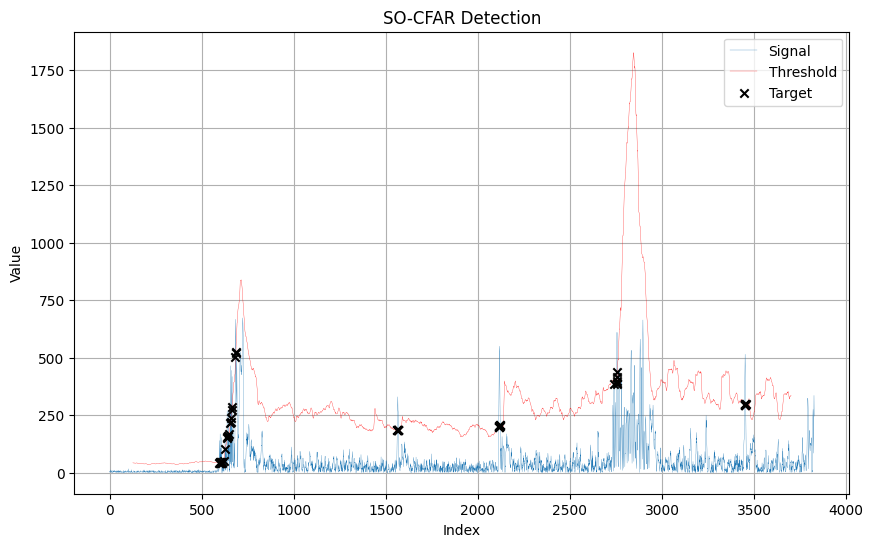

1049.6470221896361
1031.9266881224978
1010.3418131151858
989.133966492281
970.376804368023
956.5210112410585
954.9186406073279
951.7138993398668
949.5459861295253
947.9436154957947
939.7432481349382
936.9155352518843
933.710793984423
937.3868207323933
937.8581062129023
938.6121629817167
932.0141662545907
926.9242830650936
920.2320292418657
915.1421460523686
914.9536318601649
915.3306602445722
910.6178054394823
896.1022126398051
884.5085898192839
867.8250838092654
843.3182388227976
824.0897912180307
798.074832693934
776.1129293022149
755.376368159819
735.1110924979321
715.2228452204524
698.7278534026376
682.7041470653318
671.9588381097267
662.6273855956485
651.3165340634325
641.4195389727437
628.2235455184918
613.6136956227128
591.4632780387901
569.6898888392744
544.2404728917887
523.1268833649857
503.23863608750605
489.1943287683379
477.31793465951125
468.6462818181457
458.9378009196604
451.68000451982186
442.1600378135401
432.357299818953


(2.757, 2.809)

In [10]:
import numpy as np
import matplotlib.pyplot as plt

def cfar_so(xc, N, pro_N, PAD):
    # 假设回波服从高斯分布
    alpha = N * (PAD ** (-1 / N) - 1)
    target = []
    index = np.arange(1 + N/2 + pro_N/2, len(xc) - N/2 - pro_N/2)
    XT = np.zeros(len(index))

    for i in index:
        cell_left = xc[int(i - N/2 - pro_N/2) : int(i - pro_N/2)]
        cell_right = xc[int(i + pro_N/2 + 1) : int(i + N/2 + pro_N/2 + 1)]
        Z = np.min([np.mean(cell_left), np.mean(cell_right)])
        # print(alpha)
        XT[int(i - N/2 - pro_N/2-1)] = Z * alpha
        if xc[int(i)] > Z * alpha:
            target.append(int(i))
    return index, XT, target

# 均匀背景噪声
def env_uniform(variance, shape, power_db, show_out=False):
    if not show_out:
        show_out = 0

    c = 10**(power_db/10)  # 这里是幅度——功率，实际的噪声功率
    xc = c + np.random.normal(0, variance, shape)  # 产生一个正态分布/高斯分布的噪声，期望为0，标准差为variance，shape形状的数组

    if show_out:
        plt.figure()
        plt.plot(10 * np.log10(np.abs(xc)) / np.log10(10))
        plt.show()

    return xc

# 设置参数
SNR1 = 15
N = 200
pro_N = 50
PAF = 10**(-4)

# 生成噪声信号
# variance = 200
# shape = (200,)
# noise_db = 20
# noise_p = 10**(noise_db/10)
# xc = env_uniform(variance, shape, noise_db)

# # 添加信号
# signal1_p = 10**(SNR1/10) * noise_p
# xc[89] = signal1_p
xc = imu_data[:,1]
# xc = imu_data[:,0]
# 应用CFAR算法
index, XT, target_idx = cfar_so(np.abs(xc), N, pro_N, PAF)

# 可视化结果
plt.figure(figsize=(10, 6))
plt.plot((np.abs(xc)), linewidth=0.2, label='Signal')
plt.plot(index, (XT), 'r', linewidth=0.2, label='Threshold')
plt.scatter(target_idx, XT[np.array(target_idx)-int(N/2+pro_N/2)], color='black', marker='x', label='Target', zorder=2)
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('SO-CFAR Detection')
plt.legend()
plt.grid(True)
plt.show()

max_threshold = np.max(XT)
max_threshold_index = np.argmax(XT)

# 从阈值最大点向左搜索第一个目标点
first_target_index = None
for i in range(max_threshold_index+100, -1, -1):
    if i in target_idx:
        first_target_index = i
        break
# version 1    
# t_sta = first_target_index/1000
# t_sam = ((nperseg-noverlap)/fs)
# t_sta_num = round(t_sta/t_sam)
# t_stop_num = None
# for j in range(t_sta_num, 4000, 1):
#     if pp[j]<pp[t_sta_num]:
#         t_stop_num = j
#         break
# t_stop = t_stop_num*t_sam
# t_sta,t_stop
# version 2    
t_sta = first_target_index/1000
stop_target_index = None
for j in range(first_target_index, 3500, 1):
    print(XT[j])
    if XT[j]+max_threshold/3<XT[first_target_index]:
        stop_target_index = j
        break
t_stop = stop_target_index/1000
t_sta,t_stop